# Spotify Global Songs Analysis 

This notebook analyzes the **Top Spotify Songs in 73 Countries (Daily Updated)** dataset.  

In [1]:
#Import Libraries and load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_original = pd.read_csv("spotify.csv")

#create copy of the dataframe
df = df_original.copy()

#look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110316 entries, 0 to 2110315
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   spotify_id          object 
 1   name                object 
 2   artists             object 
 3   daily_rank          int64  
 4   daily_movement      int64  
 5   weekly_movement     int64  
 6   country             object 
 7   snapshot_date       object 
 8   popularity          int64  
 9   is_explicit         bool   
 10  duration_ms         int64  
 11  album_name          object 
 12  album_release_date  object 
 13  danceability        float64
 14  energy              float64
 15  key                 int64  
 16  loudness            float64
 17  mode                int64  
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signature      int6

In [2]:
df.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06
mean,2.549302e+01,9.230660e-01,2.932522e+00,7.590713e+01,1.943095e+05,6.759191e-01,6.488031e-01,5.526496e+00,-6.772439e+00,5.364571e-01,9.550408e-02,2.748491e-01,2.316185e-02,1.705588e-01,5.462535e-01,1.221008e+02,3.900368e+00
std,1.442900e+01,7.015535e+00,1.233129e+01,1.576302e+01,4.986054e+04,1.440469e-01,1.689142e-01,3.594979e+00,3.874849e+00,4.986692e-01,9.138830e-02,2.509297e-01,1.137297e-01,1.247528e-01,2.311527e-01,2.781938e+01,4.044448e-01
min,1.000000e+00,-4.900000e+01,-4.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e-05,0.000000e+00,-5.434100e+01,0.000000e+00,0.000000e+00,3.450000e-06,0.000000e+00,1.390000e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,-1.000000e+00,-3.000000e+00,6.500000e+01,1.626370e+05,5.800000e-01,5.520000e-01,2.000000e+00,-7.830000e+00,0.000000e+00,3.840000e-02,6.670000e-02,0.000000e+00,9.610000e-02,3.700000e-01,1.000190e+02,4.000000e+00
50%,2.500000e+01,0.000000e+00,0.000000e+00,7.900000e+01,1.861910e+05,7.000000e-01,6.680000e-01,6.000000e+00,-6.064000e+00,1.000000e+00,5.810000e-02,1.910000e-01,1.340000e-06,1.220000e-01,5.480000e-01,1.199650e+02,4.000000e+00
75%,3.800000e+01,2.000000e+00,5.000000e+00,8.800000e+01,2.187010e+05,7.800000e-01,7.670000e-01,9.000000e+00,-4.723000e+00,1.000000e+00,1.120000e-01,4.370000e-01,1.010000e-04,2.040000e-01,7.330000e-01,1.400210e+02,4.000000e+00
max,5.000000e+01,4.900000e+01,4.900000e+01,1.000000e+02,1.296000e+06,9.880000e-01,9.980000e-01,1.100000e+01,3.233000e+00,1.000000e+00,9.570000e-01,9.960000e-01,9.950000e-01,9.830000e-01,9.920000e-01,2.360890e+02,5.000000e+00


Check column headers and first 5 rows

In [3]:
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,NaN,2025-06-11,95,False,...,2,-6.141,1,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2,-1,48,NaN,2025-06-11,89,True,...,7,-5.087,1,0.0572,0.122000,0.000000,0.3170,0.811,123.010,4
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3,0,1,NaN,2025-06-11,98,False,...,1,-2.291,1,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4
3,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",4,0,-1,NaN,2025-06-11,91,False,...,6,-7.727,0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,0,NaN,2025-06-11,100,False,...,2,-10.171,1,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4


Checking for missing values 

In [4]:
#checking for missing values count and the percentage
missing_counts= df.isnull().sum()
missing_percentage =(missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

missing_df

,Missing Count,Missing Percentage
country,28908,1.369842
album_name,822,0.038952
album_release_date,659,0.031228
name,30,0.001422
artists,29,0.001374
daily_movement,0,0.000000
weekly_movement,0,0.000000
spotify_id,0,0.000000
daily_rank,0,0.000000
popularity,0,0.000000


Handle missing values

In [5]:
#fill missing country values as 'Unknown'
df['country']=df['country'].fillna('Unknown')

# Fill missing album_name and album_release_date as 'Unknown'
df['album_name'] = df['album_name'].fillna('Unknown')
df['album_release_date'] = df['album_release_date'].fillna('Unknown')

# Fill missing name/artists 
df['name'] = df['name'].ffill()
df['artists'] = df['artists'].ffill()

# Confirm no missing values remain
df.isnull().sum()

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64

Check for duplicates


In [6]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


Checking for Outliers using IQR method

In [7]:
# Select numeric columns for outlier detection
numeric_cols=df.select_dtypes(include=['int64', 'float64']).columns

# Create a dictionary to store outlier counts
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Flag outliers
    df[col + '_outlier'] = ((df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR)))
    outlier_counts[col] = df[col + '_outlier'].sum()

# Display outlier counts per column
outlier_counts


{'daily_rank': np.int64(0),
 'daily_movement': np.int64(327720),
 'weekly_movement': np.int64(277042),
 'popularity': np.int64(20476),
 'duration_ms': np.int64(55252),
 'danceability': np.int64(21825),
 'energy': np.int64(45382),
 'key': np.int64(0),
 'loudness': np.int64(83772),
 'mode': np.int64(0),
 'speechiness': np.int64(223239),
 'acousticness': np.int64(1475),
 'instrumentalness': np.int64(454522),
 'liveness': np.int64(143496),
 'valence': np.int64(0),
 'tempo': np.int64(10005),
 'time_signature': np.int64(237585)}

Outlier Detection Using Boxplots for specific columns

#  I have chosen not to remove the outliers. In a music dataset, extreme values are often the most interesting and valuable data points.


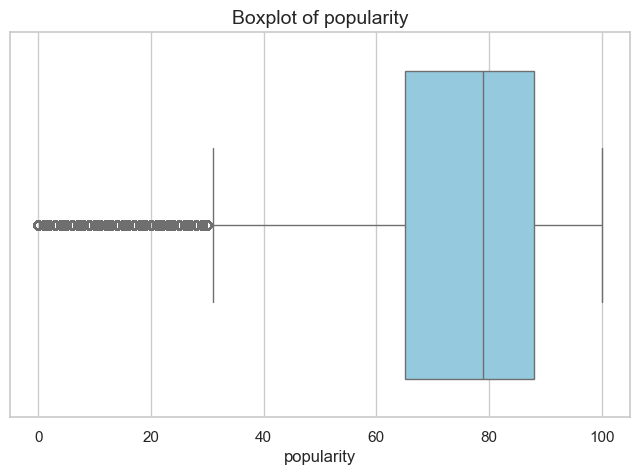

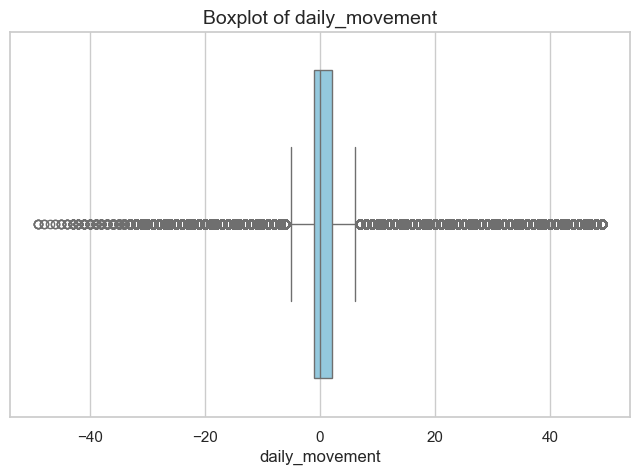

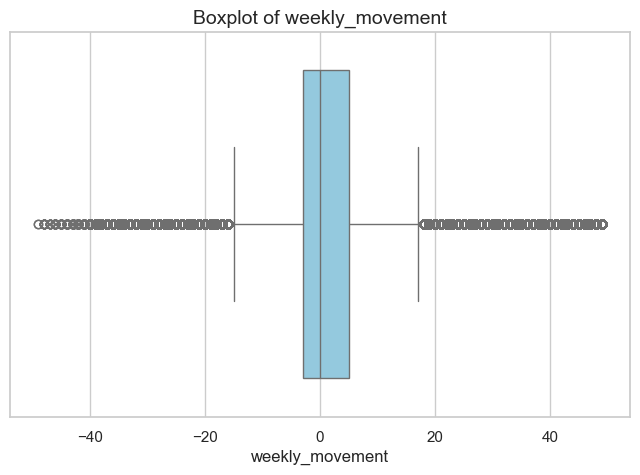

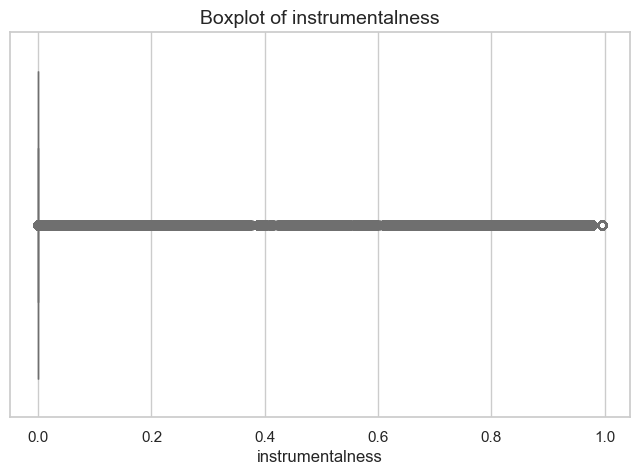

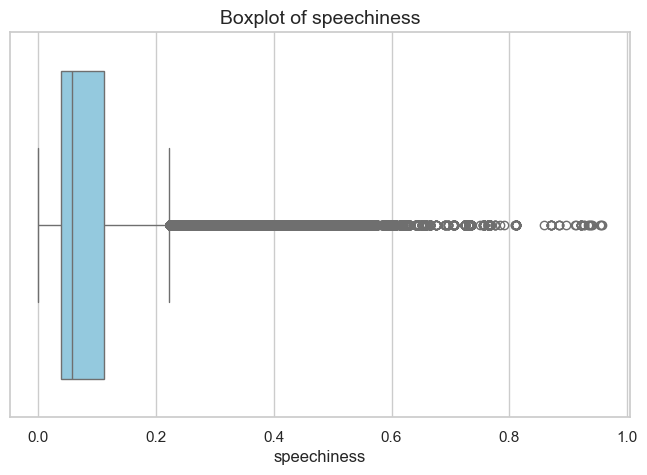

In [32]:
#best columns to show outliers
columns_to_plot = ['popularity', 'daily_movement', 'weekly_movement', 
                   'instrumentalness', 'speechiness']

# Set style
sns.set(style="whitegrid")

for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.show()

Distribution of Key Audio Features

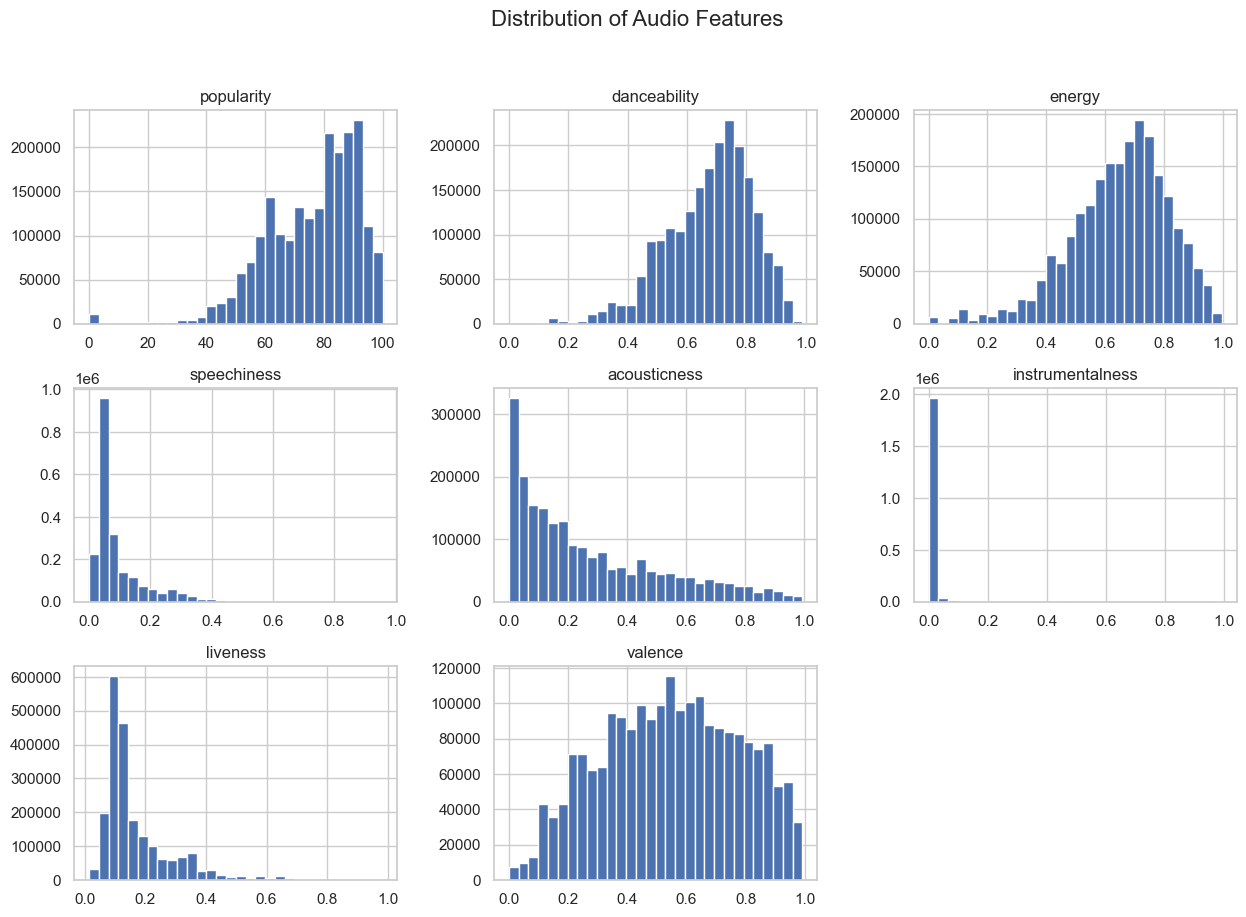

In [9]:
numeric_cols = ['popularity','danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']
df[numeric_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribution of Audio Features", fontsize=16)
plt.show()

Univariate analysis (one variable at a time)

<Axes: xlabel='popularity'>

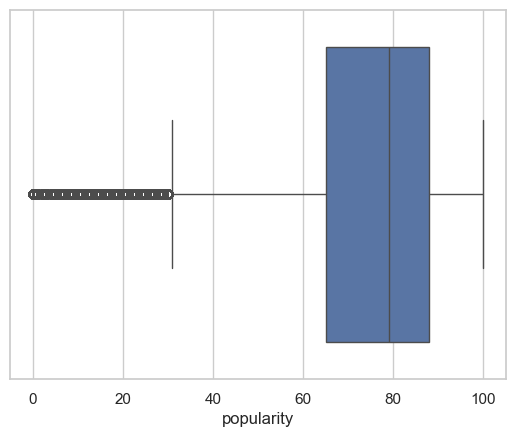

In [10]:
sns.boxplot(x=df['popularity'])

<Axes: xlabel='energy', ylabel='Count'>

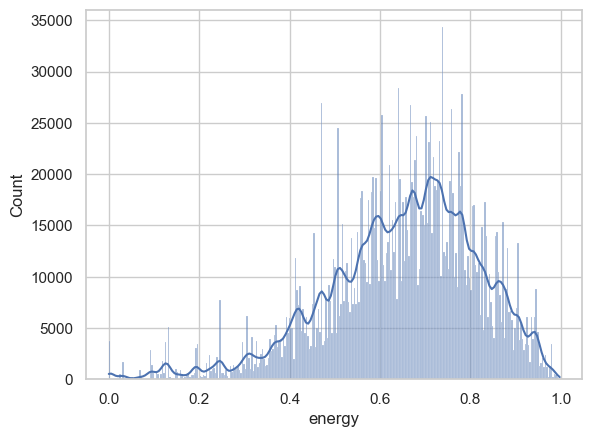

In [11]:
sns.histplot(df['energy'], kde=True)

Bivariate analysis (relationships between two variables)

<Axes: xlabel='energy', ylabel='danceability'>

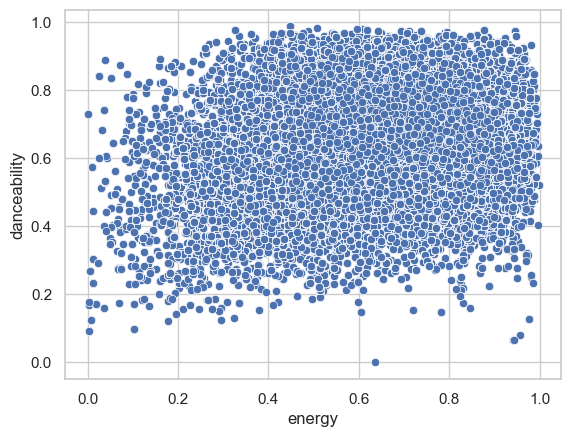

In [12]:
sns.scatterplot(x='energy', y='danceability', data=df)

Top Countries with Most Songs

In [13]:
df['country'].value_counts().head(10)

country
DO    29176
IT    29174
NI    29170
PL    29164
HU    29163
HN    29162
SV    29162
TH    29161
EG    29161
CZ    29161
Name: count, dtype: int64

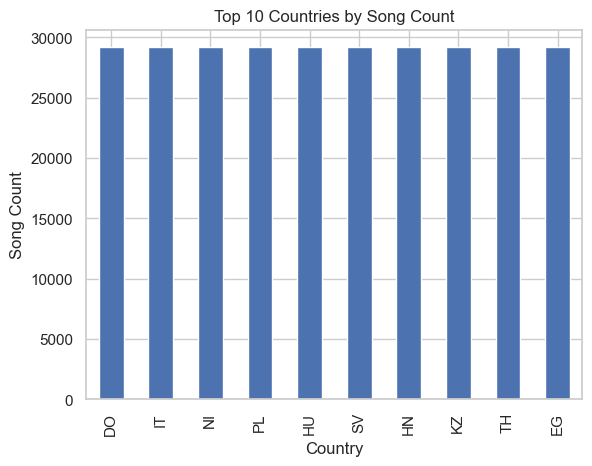

In [24]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Song Count')
plt.xlabel('Country')
plt.ylabel('Song Count')
plt.show()

Top Artists

In [14]:
df['artists'].value_counts().head(10)

artists
Billie Eilish            32587
Bad Bunny                31905
Sabrina Carpenter        29042
KAROL G                  20737
Jimin                    18755
Taylor Swift             18632
Benson Boone             16759
Lady Gaga, Bruno Mars    16364
Teddy Swims              15607
Tate McRae               13212
Name: count, dtype: int64

audio features - Comparing features of top vs non-top songs

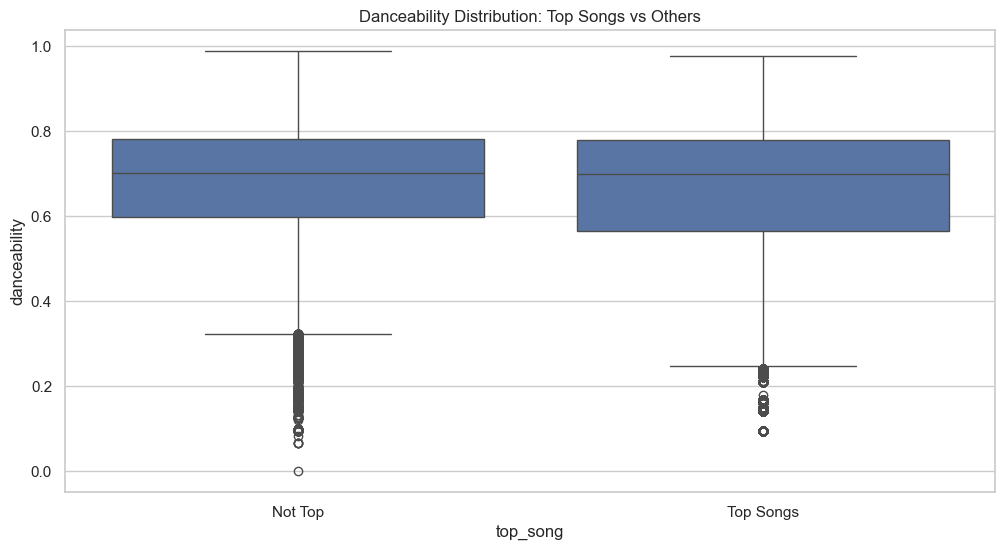

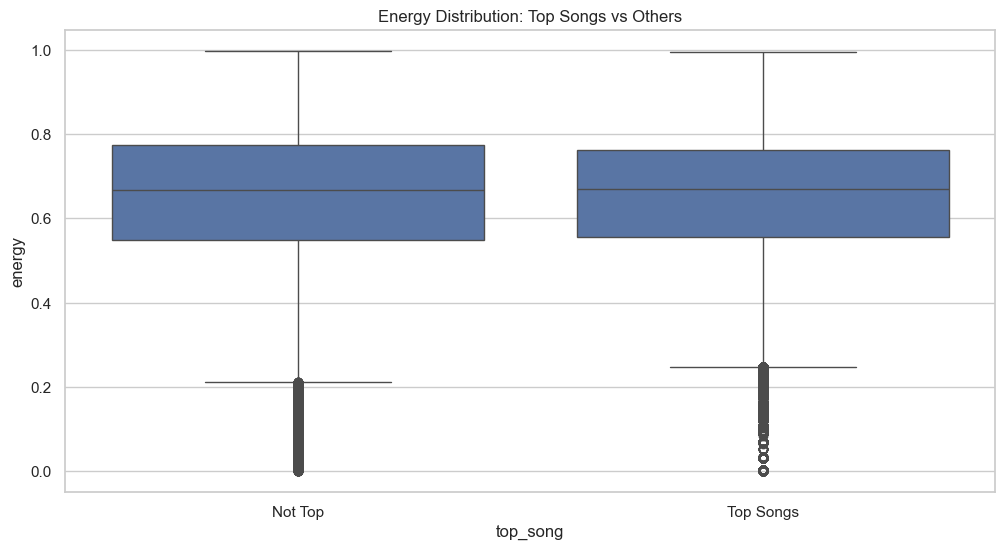

In [ ]:
df["top_song"] = df["popularity"] > 75

features = ["danceability", "energy"]

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="top_song", y="danceability")
plt.title("Danceability Distribution: Top Songs vs Others")
plt.xticks([0,1], ["Not Top", "Top Songs"])
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="top_song", y="energy")
plt.title("Energy Distribution: Top Songs vs Others")
plt.xticks([0,1], ["Not Top", "Top Songs"])
plt.show()

Correlation Analysis

Numeric columns used for correlation:
 ['daily_rank', 'daily_movement', 'weekly_movement', 'popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'year', 'month', 'weekday_num'] 



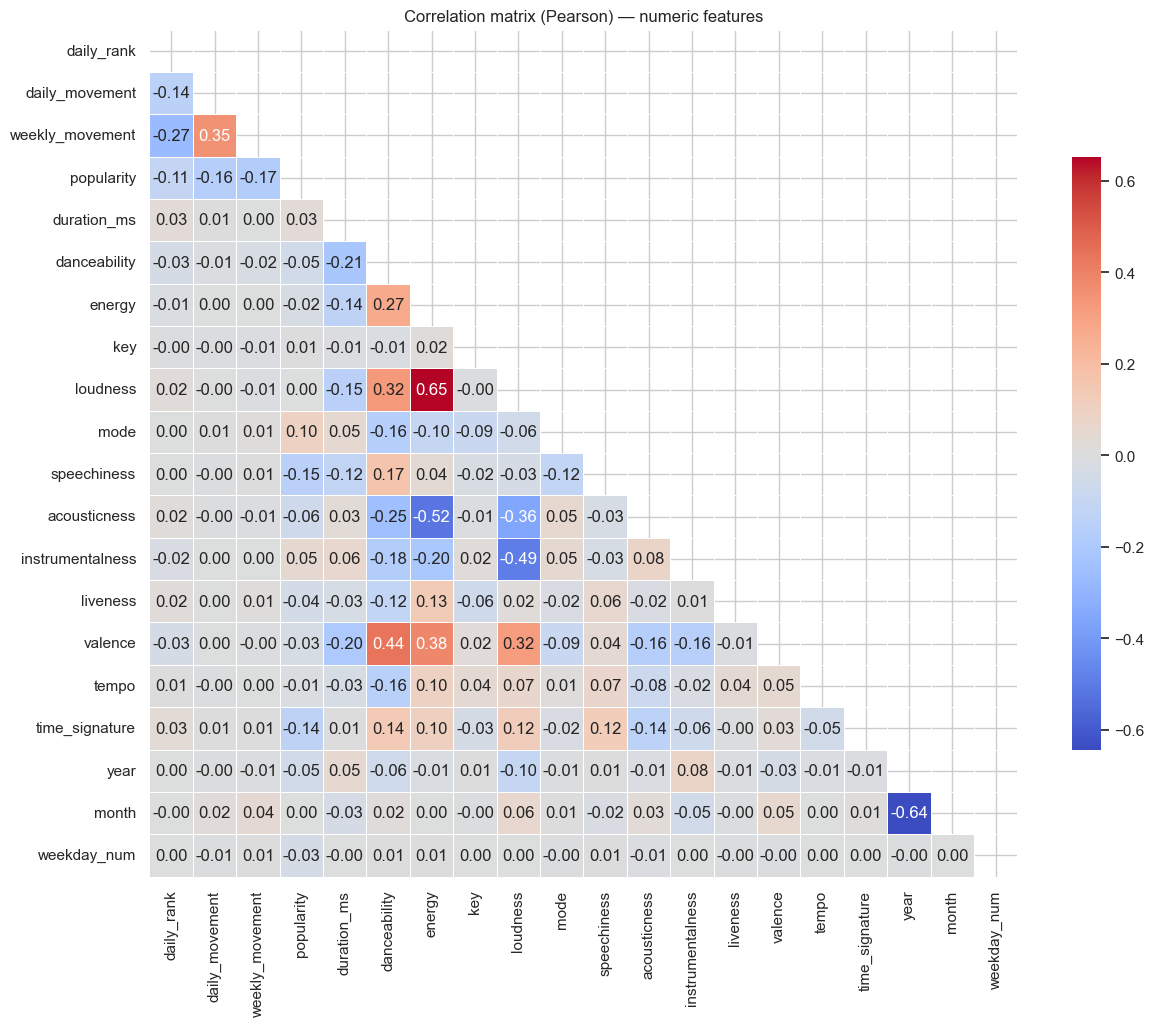

Top positive correlations with 'popularity':
 mode                0.095509
instrumentalness    0.048032
duration_ms         0.027665
key                 0.007168
month               0.003309
loudness            0.000583
tempo              -0.007697
energy             -0.024870
valence            -0.026653
weekday_num        -0.032147
Name: popularity, dtype: float64 

Top negative correlations with 'popularity':
 weekly_movement   -0.174609
daily_movement    -0.164291
speechiness       -0.147824
time_signature    -0.136093
daily_rank        -0.108307
acousticness      -0.063579
danceability      -0.054048
year              -0.051835
liveness          -0.042607
weekday_num       -0.032147
Name: popularity, dtype: float64 

Saved correlation matrix to 'spotify_correlation_matrix.csv'


In [15]:
import calendar

#Convert snapshot_date to datetime and create time features
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'], errors='coerce')
df['year']= df['snapshot_date'].dt.year
df['month']= df['snapshot_date'].dt.month
df['weekday']= df['snapshot_date'].dt.day_name()
df['weekday_num']= df['snapshot_date'].dt.weekday

#Select numeric columns but exclude columns created for outlier flags (ending with '_outlier')
numeric_cols= [c for c in df.select_dtypes(include=[np.number]).columns if not c.endswith('_outlier')]
print("Numeric columns used for correlation:\n", numeric_cols, "\n")

#Compute Pearson correlation matrix
corr = df[numeric_cols].corr(method='pearson')

#Plot correlation heatmap (mask upper triangle for readability)
plt.figure(figsize=(14,11))
mask =np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .7})
plt.title('Correlation matrix (Pearson) — numeric features')
plt.show()

#Printing the  top positive/negative correlations with 'popularity'
if 'popularity' in corr.columns:
    top_pos = corr['popularity'].drop('popularity').sort_values(ascending=False).head(10)
    top_neg = corr['popularity'].drop('popularity').sort_values(ascending=True).head(10)
    print("Top positive correlations with 'popularity':\n", top_pos, "\n")
    print("Top negative correlations with 'popularity':\n", top_neg, "\n")
else:
    print("'popularity' not found among numeric columns.")
    
# Save correlation matrix for later reference
corr.to_csv('spotify_correlation_matrix.csv')
print("Saved correlation matrix to 'spotify_correlation_matrix.csv'")

Compute Spearman correlation

In [16]:
spearman_corr = df[numeric_cols].corr(method='spearman')
spearman_corr.loc['popularity'].sort_values(ascending=False).head(12)

popularity          1.000000
mode                0.104309
loudness            0.098044
duration_ms         0.072811
instrumentalness    0.065235
key                 0.005441
tempo               0.001298
month              -0.005959
weekday_num        -0.012523
energy             -0.032488
liveness           -0.032521
valence            -0.039941
Name: popularity, dtype: float64

Time-series visualizations (global & by-country + weekday×month heatmap)

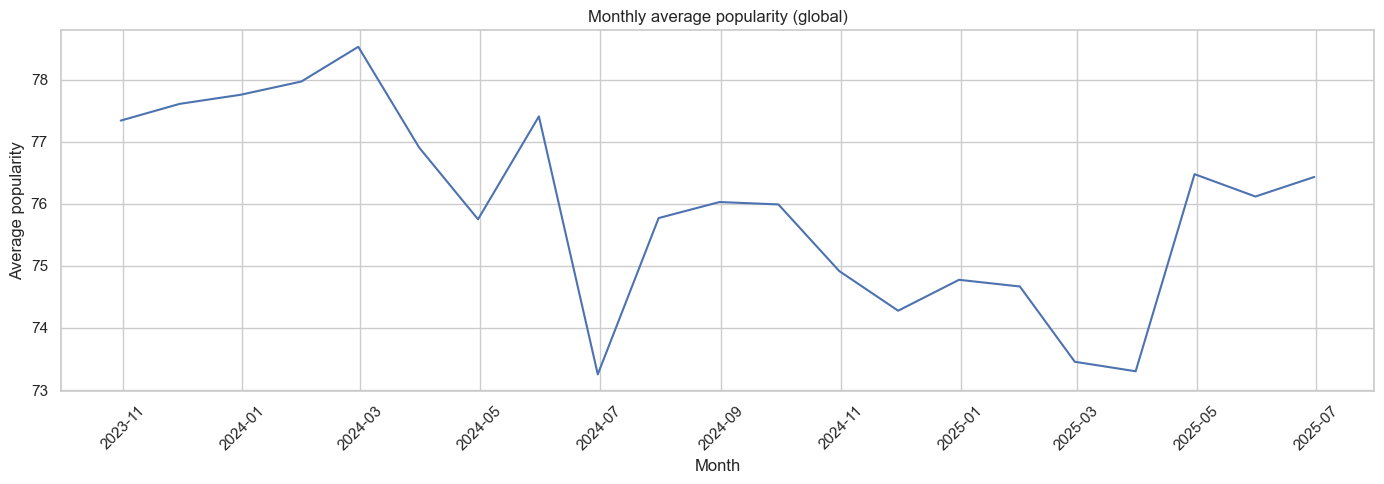

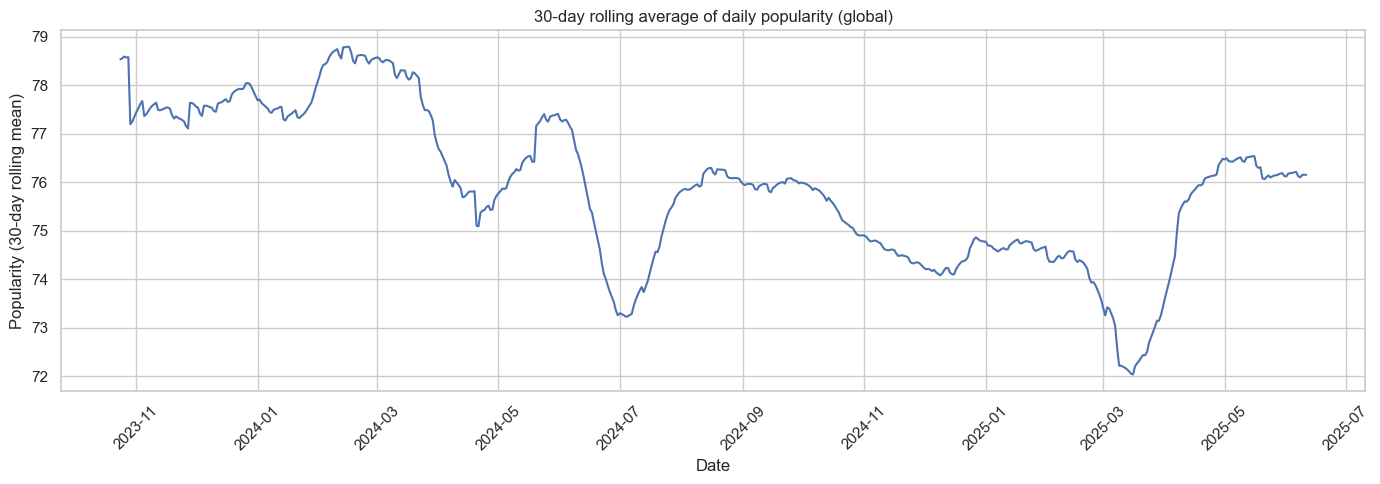

Top countries (by number of rows): ['DO', 'IT', 'NI', 'PL', 'HU', 'HN']


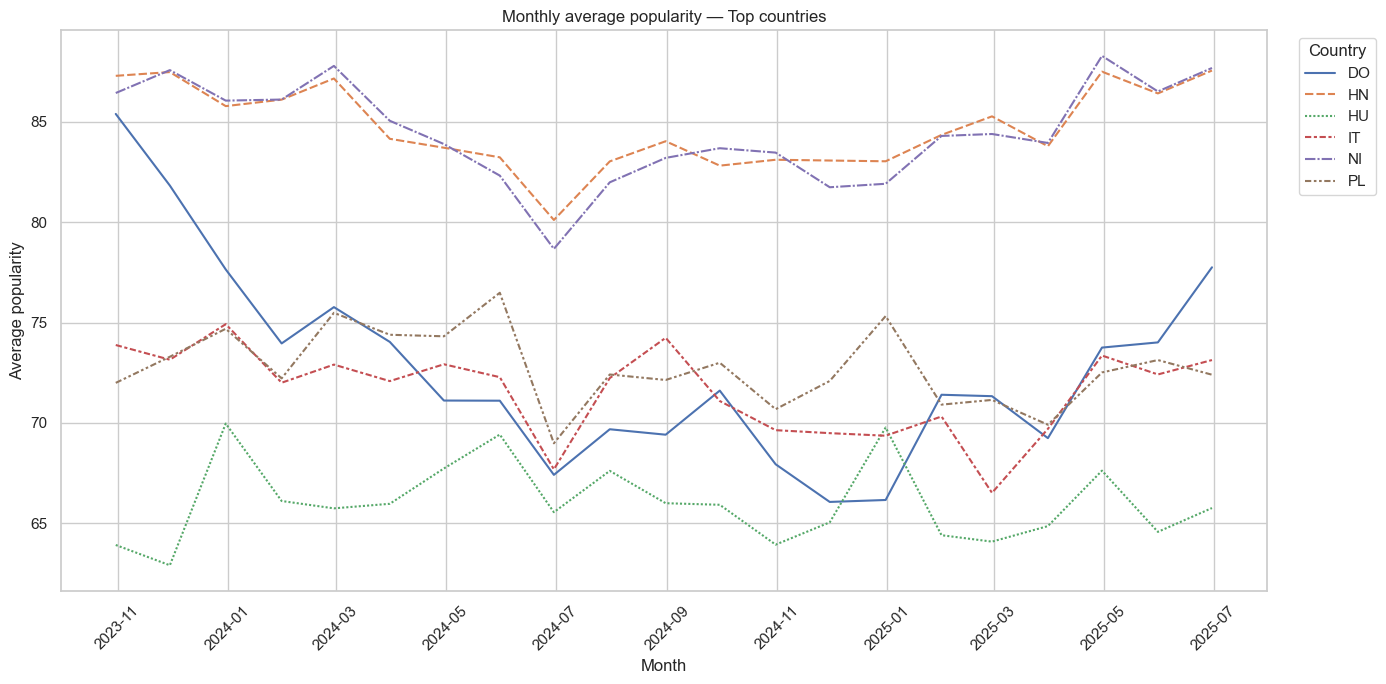

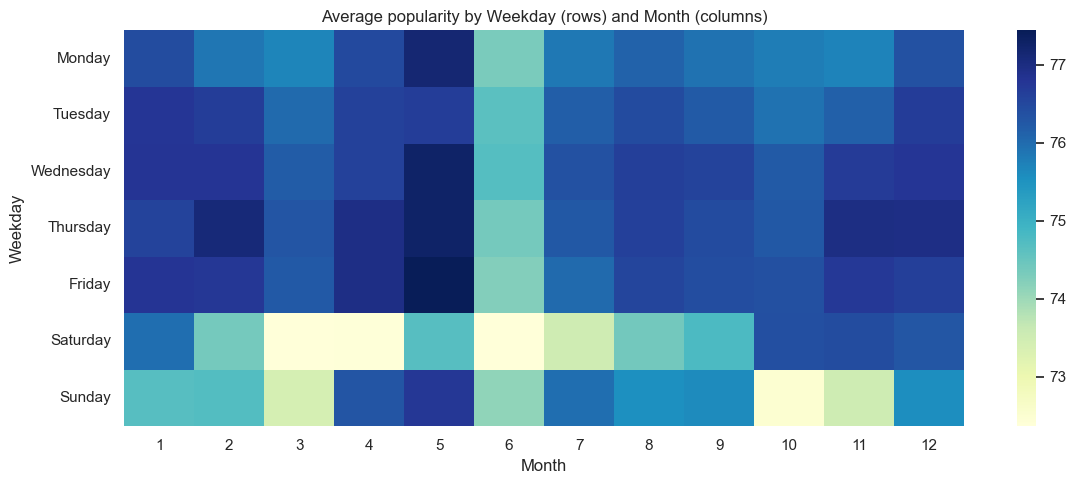

In [17]:
#Set index for resampling
df_ts = df.set_index('snapshot_date')

# 1) Monthly average popularity (global)
monthly_pop = df_ts['popularity'].resample('ME').mean()
plt.figure(figsize=(14,5))
sns.lineplot(x=monthly_pop.index, y=monthly_pop.values)
plt.title('Monthly average popularity (global)')
plt.ylabel('Average popularity')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2) 30-day rolling average of daily popularity
daily_pop = df_ts['popularity'].resample('D').mean()
rolling_30 = daily_pop.rolling(window=30, min_periods=7).mean()
plt.figure(figsize=(14,5))
sns.lineplot(x=rolling_30.index, y=rolling_30.values)
plt.title('30-day rolling average of daily popularity (global)')
plt.ylabel('Popularity (30-day rolling mean)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Monthly average popularity for top countries (by row count)
top_countries = df['country'].value_counts().nlargest(6).index.tolist()
print("Top countries (by number of rows):", top_countries)

monthly_country = (
    df[df['country'].isin(top_countries)]
      .groupby([pd.Grouper(key='snapshot_date', freq='ME'), 'country'])['popularity']
      .mean()
      .unstack('country')
)

plt.figure(figsize=(14,7))
sns.lineplot(data=monthly_country)
plt.title('Monthly average popularity — Top countries')
plt.ylabel('Average popularity')
plt.xlabel('Month')
plt.legend(title='Country', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4) Heatmap: average popularity by weekday (rows) and month (columns)
pivot = df.pivot_table(index='weekday_num', columns='month', values='popularity', aggfunc='mean')
pivot.index = [calendar.day_name[i] for i in pivot.index]
plt.figure(figsize=(12,5))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title('Average popularity by Weekday (rows) and Month (columns)')
plt.ylabel('Weekday')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# Finalize cleaned dataset CSV for Tableau

In [18]:
import os

#convert date columns to datetime
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'], errors='coerce')
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

#create a month-period column (useful in Tableau)
df['month_period'] = df['snapshot_date'].dt.to_period('M').dt.to_timestamp('M')

#Drop analysis-only columns (outlier flags columns that was creates before) to keep the new CSV clean
cols_to_drop = [c for c in df.columns if c.endswith('_outlier')]
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)

#Downcast numeric types to reduce file size
int_cols = df.select_dtypes(include=['int64']).columns.tolist()
float_cols = df.select_dtypes(include=['float64']).columns.tolist()

for c in int_cols:
    try:
        df[c] = pd.to_numeric(df[c], downcast='integer')
    except Exception:
        pass

for c in float_cols:
    try:
        df[c] = pd.to_numeric(df[c], downcast='float')
    except Exception:
        pass

#convert large text columns to category to reduce memory (Will be saved as strings in CSV)
for c in ['country', 'name', 'artists', 'album_name']:
    if c in df.columns:
        df[c] = df[c].astype('category')

#Re-checking important dtypes
print("Key dtypes after conversion:")
print(df[['snapshot_date','album_release_date','month_period']].dtypes)
print("\nMemory usage (MB):", df.memory_usage(deep=True).sum() / 1024**2)

#Save a single cleaned CSV for Tableau use
out_path = 'spotify_cleaned.csv'
df.to_csv(out_path, index=False)
print(f"\nCleaned data saved to '{out_path}'. You can now use this file in Tableau.")

#Print csv file size
try:
    size_mb = os.path.getsize(out_path) / 1024**2
    print(f"File size: {size_mb:.2f} MB")
except Exception:
    pass

# Show a quick preview of the new csv file
print("\nQuick preview of the cleaned data:")
df.head(3)


Key dtypes after conversion:
snapshot_date         datetime64[ns]
album_release_date    datetime64[ns]
month_period          datetime64[ns]
dtype: object

Memory usage (MB): 444.3043956756592

Cleaned data saved to 'spotify_cleaned.csv'. You can now use this file in Tableau.
File size: 435.58 MB

Quick preview of the cleaned data:


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,instrumentalness,liveness,valence,tempo,time_signature,year,month,weekday,weekday_num,month_period
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,Unknown,2025-06-11,95,False,...,0.000007,0.0550,0.391,168.115005,3,2025,6,Wednesday,2,2025-06-30
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2,-1,48,Unknown,2025-06-11,89,True,...,0.000000,0.3170,0.811,123.010002,4,2025,6,Wednesday,2,2025-06-30
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3,0,1,Unknown,2025-06-11,98,False,...,0.000088,0.0929,0.235,92.855003,4,2025,6,Wednesday,2,2025-06-30
